In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd


In [3]:
# Read the CSV file and display the first five rows
import os

# Construct the relative path to the dataset
relative_path = os.path.join("data", "retail_sales_dataset.csv")

df = pd.read_csv(relative_path)
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
# Displays summary information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [50]:
# Check for missing values
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [51]:
# Check duplicate rows
print(df.duplicated().sum())

0


In [5]:
# Convert Date from object datatype to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Converting the Gender and Product category from object datatype to category type
# will optimize memory usage and improve analysis efficiency.

# Convert categorical variables to category type
df["Gender"] = df["Gender"].astype("category")
df["Product Category"] = df["Product Category"].astype("category")


In [8]:
# Display summary statistics for numerical variables like Age, Quantity, Price per Unit and Total amount
df.describe()


,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [43]:
# Get unique Product Category values
df['Product Category'].unique()

['Beauty', 'Clothing', 'Electronics']
Categories (3, object): ['Beauty', 'Clothing', 'Electronics']

In [44]:
# Display % of Product distribution
df['Product Category'].value_counts(normalize=True) * 100

Product Category
Clothing       35.1
Electronics    34.2
Beauty         30.7
Name: proportion, dtype: float64

In [45]:
# Find the min and max values for specific product categories
beauty_data = df[df['Product Category'] == 'Beauty']
clothing_data = df[df['Product Category'] == 'Clothing']
electronics_data = df[df['Product Category'] == 'Electronics']

# Calculate the min and max for each category
beauty_min_max = beauty_data['Price per Unit'].agg(['min', 'max'])
clothing_min_max = clothing_data['Price per Unit'].agg(['min', 'max'])
electronics_min_max = clothing_data['Price per Unit'].agg(['min', 'max'])

# Print the results
print("Beauty Category - Min and Max Price per Unit:")
print(beauty_min_max)

print("\nClothing Category - Min and Max Price per Unit:")
print(clothing_min_max)

print("\nElectronics Category - Min and Max Price per Unit:")
print(electronics_min_max)

Beauty Category - Min and Max Price per Unit:
min     25
max    500
Name: Price per Unit, dtype: int64

Clothing Category - Min and Max Price per Unit:
min     25
max    500
Name: Price per Unit, dtype: int64

Electronics Category - Min and Max Price per Unit:
min     25
max    500
Name: Price per Unit, dtype: int64


In [46]:
# Get unique Gender values
df['Gender'].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [48]:
# Display % of Gender distribution
df['Gender'].value_counts(normalize=True) * 100

Gender
Female    51.0
Male      49.0
Name: proportion, dtype: float64

In [49]:
# Find the min and max age of the customers among males and females
males_data = df[df['Gender'] == 'Male']
females_data = df[df['Gender'] == 'Female']

# Calculate the min and max age of the males and females
males_age_min_max = males_data['Age'].agg(['min', 'max'])
females_age_min_mix = females_data['Age'].agg(['min', 'max'])

print("Gender - Males: Min and Max age")
print(males_age_min_max)

print("Gender - Females: Min and Max age")
print(females_age_min_mix)


Gender - Males: Min and Max age
min    18
max    64
Name: Age, dtype: int64
Gender - Females: Min and Max age
min    18
max    64
Name: Age, dtype: int64


# Findings on the Retail Dataset

- The dataset contains no missing values.
- There are no duplicate rows in the data.

### Some findings on the columns 
- Gender:
    - There are two unique values:
        - Female
        - Male
    - 51% of purchases were made by female customers, and 49% by male customers.

- Age
    - Customer ages range from 18 to 64 years old.
    - The mean age of customers is approximately 41 years.
    - The age range for Female customers is between 18 and 64 years.
    - Similarly, the age range for Male customers is between 18 and 64 years.

- Quantity
    - The minimum quantity purchased per transaction is 1, and the maximum is 4.
    - The average quantity purchased per transaction is 2.5 (approximately 3).

- Product Category
    - There are three unique product categories in the data:
        - Beauty
        - Clothing
        - Electronics 

    - The distribution of transactions in each of these categories is as follows
        - Clothing       35.1%
        - Electronics    34.2%
        - Beauty         30.7%

- Price per Unit
    - The minimum price per unit is $25, and the maximum price is $500.
    - The average price per unit is $180.
    - The price range for the Beauty category is between $25 and $500.
    - The price range for the Clothing category is between $25 and $500.
    - The price range for the Electronics category is between $25 and $500.
     

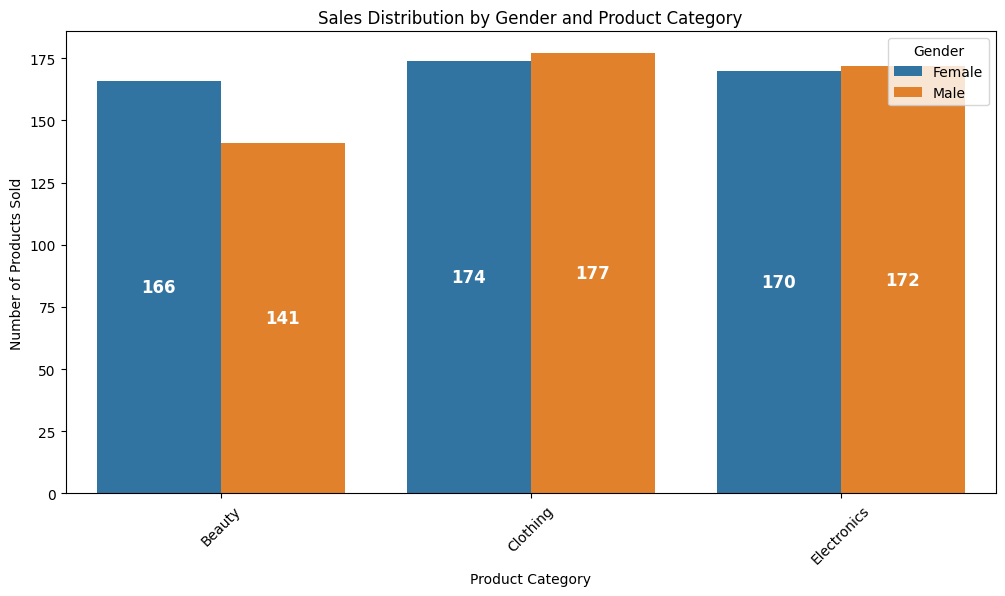

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total no.of transaction for each "Gender" and "Product Category"

# Count the number of products sold per gender per category
category_gender_counts = df.groupby(["Gender", "Product Category"], observed=True).size().reset_index(name="Count")

# Plot the data using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Product Category", y="Count", hue="Gender", data=category_gender_counts)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=12, padding=0, label_type="center", color="white", weight="bold")

# Add labels and title
plt.xlabel("Product Category")
plt.ylabel("Number of Products Sold")
plt.title("Sales Distribution by Gender and Product Category")
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.legend(title="Gender")

# Show the plot
plt.show()

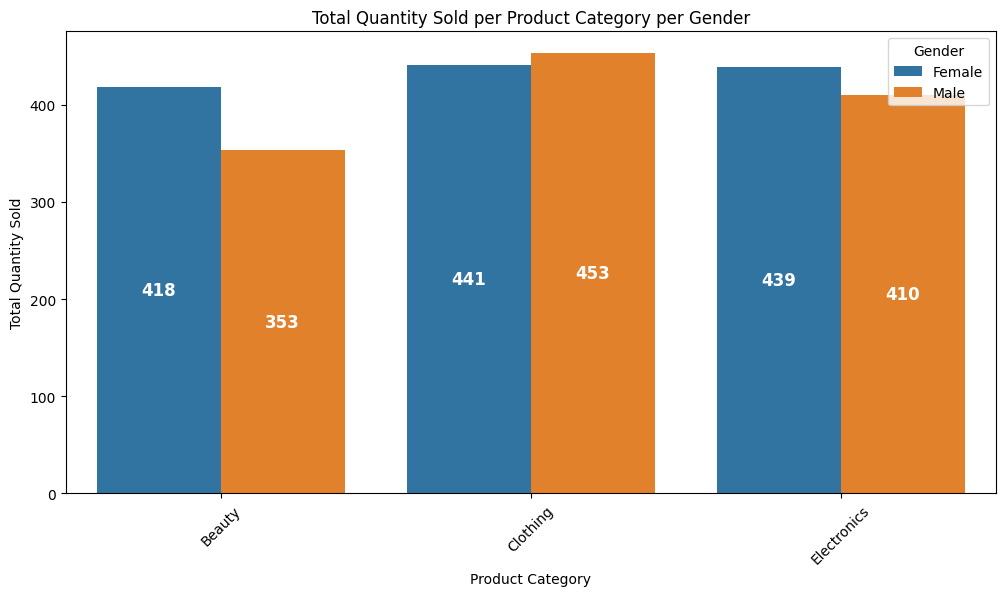

In [69]:
# Find the actual number of units sold per category per gender.

# Group by Gender and Product Category, summing up the Quantity
category_gender_quantity = df.groupby(["Gender", "Product Category"], observed = True)["Quantity"].sum().reset_index()

# Plot the data using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Product Category", y="Quantity", hue="Gender", data=category_gender_quantity)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=12, padding=0, label_type="center", color="white", weight="bold")

# Add labels and title
plt.xlabel("Product Category")
plt.ylabel("Total Quantity Sold")
plt.title("Total Quantity Sold per Product Category per Gender")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title="Gender")

# Show the plot
plt.show()

In [71]:
# Ensure the Date column is in datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Extract Year-Month for grouping
df["Year-Month"] = df["Date"].dt.to_period("M")  

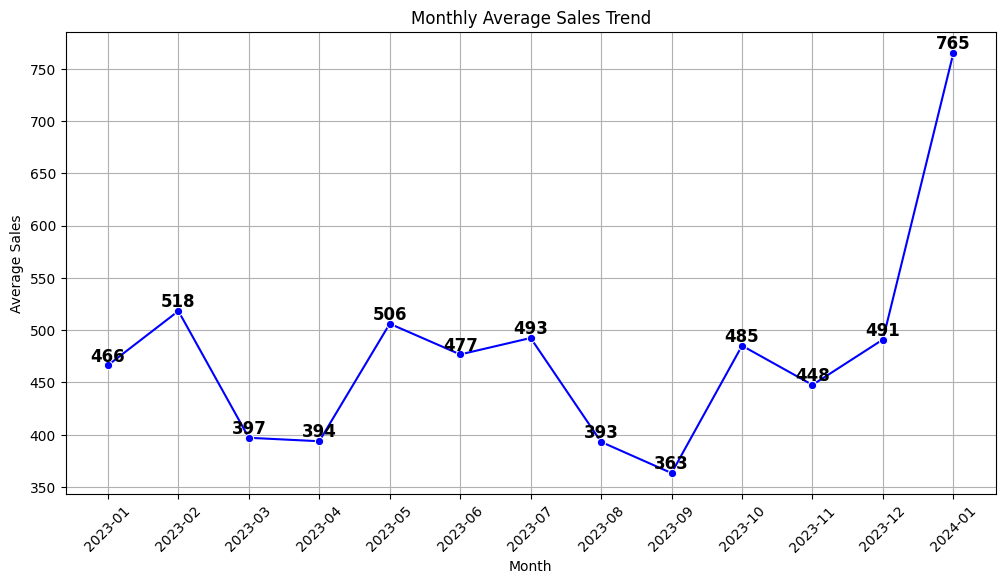

In [121]:
# Plot Monthly Average Sales

# Calculate the Monthly Average Sales
monthly_avg_sales = df.groupby("Year-Month")["Total Amount"].mean().reset_index()

# Convert Period format to String for plotting
monthly_avg_sales["Year-Month"] = monthly_avg_sales["Year-Month"].astype(str)

# Plot the Monthly Average Sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_sales, x="Year-Month", y="Total Amount", marker="o", color="b")

# Annotate each point with its value
for i, row in monthly_avg_sales.iterrows():
    plt.text(row["Year-Month"], row["Total Amount"], f"{row['Total Amount']:.0f}", 
             ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Formatting the plot
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.title("Monthly Average Sales Trend")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)

# Show the plot
plt.show()

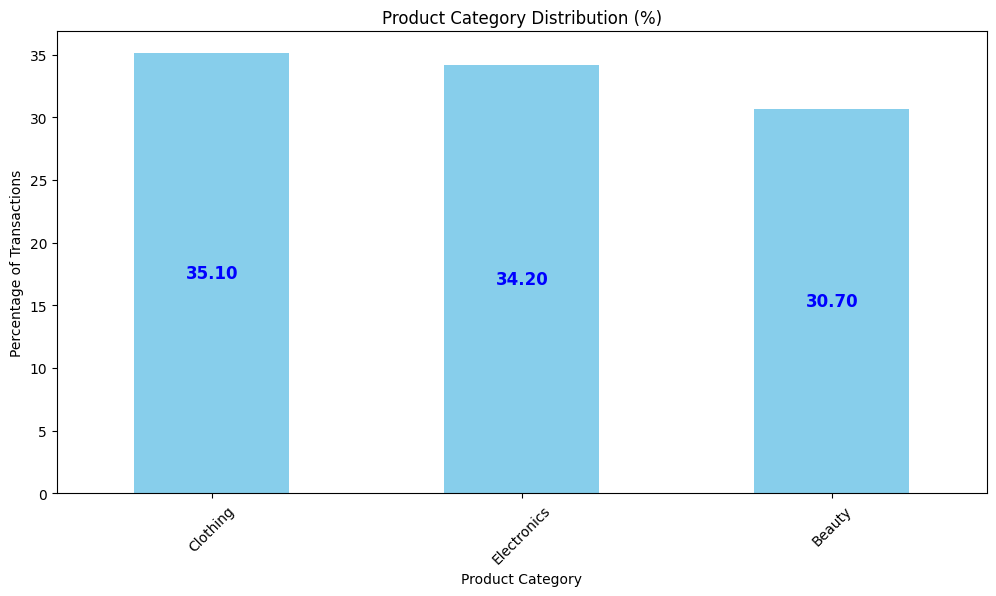

In [ ]:
# Plot the Product category distribution

plt.figure(figsize=(12, 6))
ax = df['Product Category'].value_counts(normalize=True).mul(100).plot(kind='bar', color='skyblue')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type="center", padding=0, fontsize=12, color="blue", weight="bold")

plt.title("Product Category Distribution (%)")
plt.xlabel("Product Category")
plt.ylabel("Percentage of Transactions")
plt.xticks(rotation=45)
plt.show()

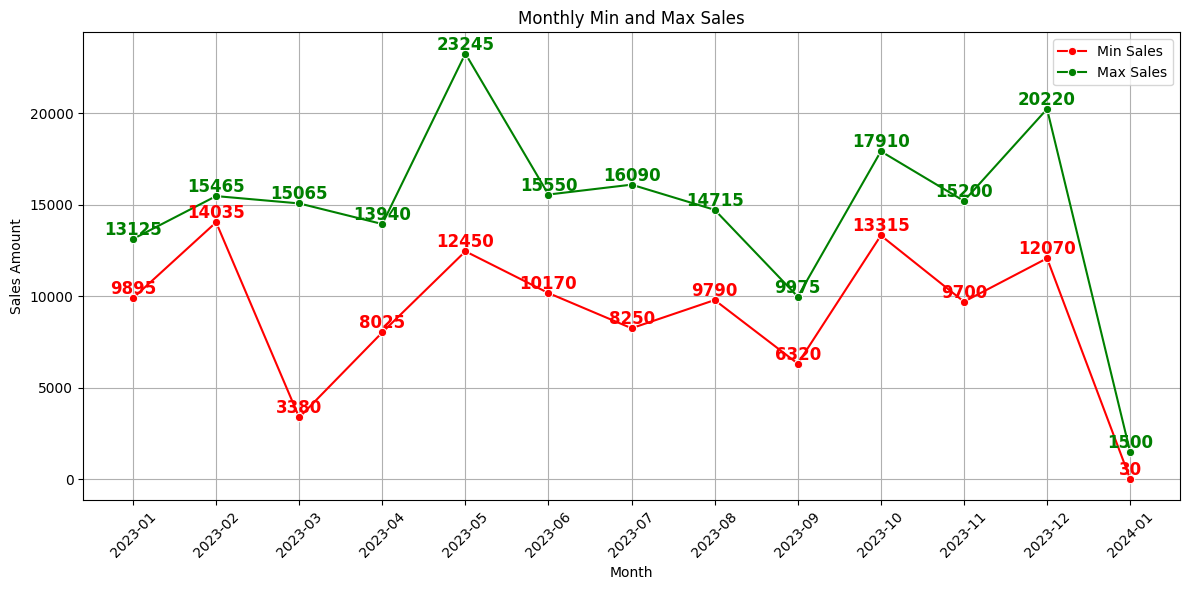

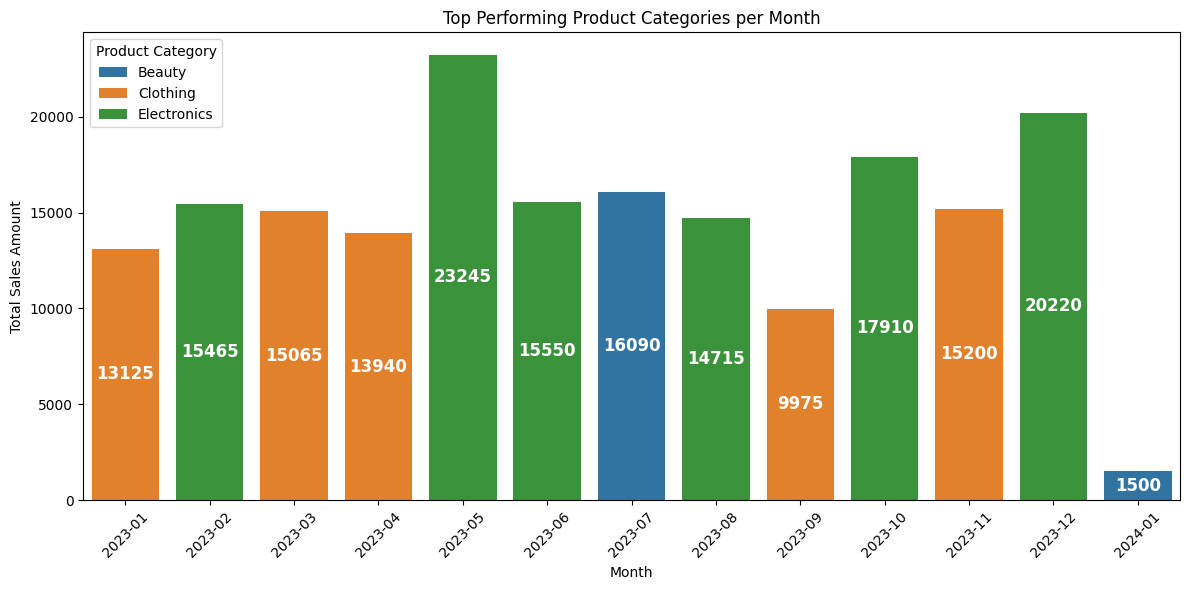

In [110]:
# Plot the monthly max and min sales and the top performing product category

# Group by month and Product Category, then calculate total sales
monthly_sales = df.groupby(['Year-Month', 'Product Category'], observed=True)['Total Amount'].sum().reset_index()

# Calculate min and max sales per month
monthly_sales_min_max = monthly_sales.groupby('Year-Month', observed=True)['Total Amount'].agg(['min', 'max']).reset_index()

# Identify top-performing product category each month
top_categories = monthly_sales.loc[monthly_sales.groupby('Year-Month', observed=True)['Total Amount'].idxmax()]

# convert the Year-Month to string type for plotting
monthly_sales_min_max['Year-Month'] = monthly_sales_min_max['Year-Month'].astype('str')
top_categories['Year-Month'] = top_categories['Year-Month'].astype('str')

# Plotting the monthly min and max sales
plt.figure(figsize=(12, 6))

# Plot for Min Sales
sns.lineplot(data=monthly_sales_min_max, x='Year-Month', y='min', marker='o', label='Min Sales', color='red')

# Annotate each point with its value
for i, row1 in monthly_sales_min_max.iterrows():
    plt.text(row1['Year-Month'], row1['min'], f"{row1['min']:.0f}", 
             ha='center', va='bottom', fontsize=12, color='red', weight='bold')
    
# Plot for Max Sales
sns.lineplot(data=monthly_sales_min_max, x='Year-Month', y='max', marker='o', label='Max Sales', color='green')

# Annotate each point with its value
for j, row2 in monthly_sales_min_max.iterrows():
    plt.text(row2['Year-Month'], row2['max'], f"{row2['max']:.0f}", 
             ha='center', va='bottom', fontsize=12, color='green', weight='bold')
    
# Title and labels
plt.title('Monthly Min and Max Sales')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

# Plotting the top-performing product categories
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=top_categories, x='Year-Month', y='Total Amount', hue='Product Category', dodge=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type="center", padding=0, fontsize=12, color="white", weight="bold")

# Title and labels
plt.title('Top Performing Product Categories per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.tight_layout()

plt.show()


- The plot reveals that the Electronics product category recorded the highest sales in February, May, June, August, October, and December of 2023
- Meanwhile, the Clothing category led in sales during January, March, April, September, and November of the same year.

### This insight suggests that businesses should prioritize stocking popular products in the high-performing Electronics category, followed by Clothing, to maximize sales opportunities.

C:\Users\Amit.Sindhwani\AppData\Local\Temp\ipykernel_37648\1759615603.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=age_group_sales, x='Age Group', y='Total Amount', palette='viridis')


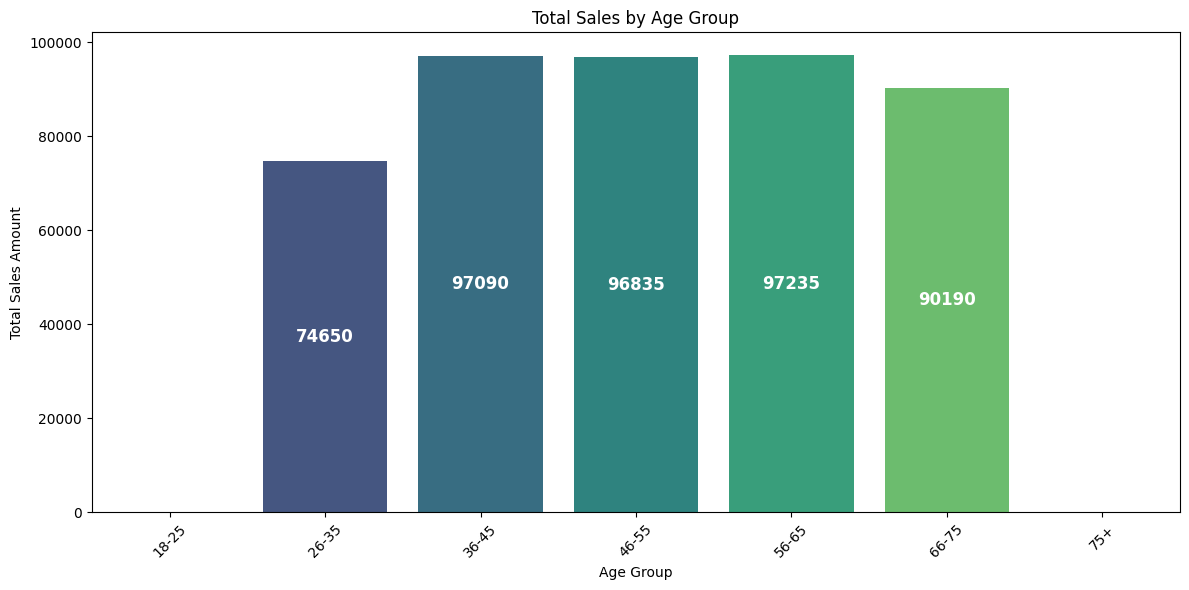

In [120]:
# Plot the total sales based on Age groups

# Create age groups (bins)
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]

# Define the labels for age groups
age_bins_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '75+']  

# Create a new 'age_group' column based on the bins
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_bins_labels, right=False)

# Group by age group and calculate total sales (sum of 'Total Amount')
age_group_sales = df.groupby('Age Group', observed=True)['Total Amount'].sum().reset_index()

#Plot the total sales by age group
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=age_group_sales, x='Age Group', y='Total Amount', palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type="center", padding=0, fontsize=12, color="white", weight="bold")

# Add labels and title
plt.title('Total Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels

# Display the plot
plt.tight_layout()
plt.show()


- The plot indicates that the majority of customers fall within the 36-65 age range.
- The 56-65 age group has the highest number of purchases, followed closely by the 36-45 and 46-55 age groups, with only a slight variation in sales among them.

### This insight suggests that businesses should prioritize 
- Tailoring marketing strategies and product offerings to appeal to customers aged 36-65.
- Creating loyalty programs or personalized promotions for the 56-65 demographic, as they are the most active buyers.
- Ensuring a seamless shopping experience to cater to this age group’s preferences
